# HW3 : Neural Networks and Stochastic Gradient Descent

This is the starter notebook for HW3.

### Instructions

The authoritative HW3 instructions are on the course website:

http://www.cs.tufts.edu/comp/135/2024f/assignments/hw3.html

Please report any questions to Piazza.

We've tried to make random seeds set explicitly so you can reproduce these exact results, but remember that some differences across platforms might occur, so the exact count of how many runs "converge" or not may not be precise (though hopefully in the same ballpark).

In [1]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier
import sklearn.metrics 

In [2]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

In [3]:
# Used for some bonus visualizations

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

# Load the "Flower XOR" dataset


10,000 labeled examples in training set

Each example has 2 features ($x_{n1}, x_{n2}$)

Each label is binary (0 or 1)

In [17]:
DATA_DIR = "data_flower" # TODO fix to path on your local system

In [18]:
# Load training data
x_tr_N2 = np.loadtxt(os.path.join(DATA_DIR, 'x_train.csv'), skiprows=1, delimiter=',')
y_tr_N = np.loadtxt(os.path.join(DATA_DIR, 'y_train.csv'), skiprows=1, delimiter=',')

# Load test data
x_te_T2 = np.loadtxt(os.path.join(DATA_DIR, 'x_test.csv'), skiprows=1, delimiter=',')
y_te_T = np.loadtxt(os.path.join(DATA_DIR, 'y_test.csv'), skiprows=1, delimiter=',')

assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_T2.shape[0] == y_te_T.shape[0]

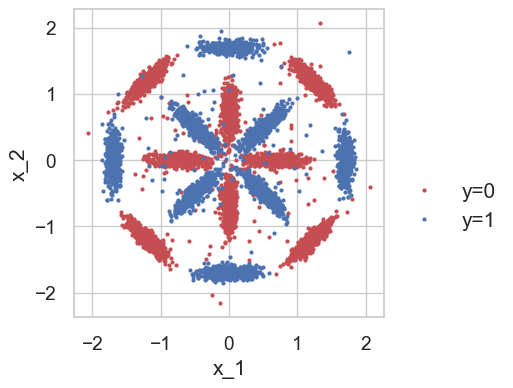

In [19]:
fig, _ = plt.subplots(figsize=(4,4));
plt.plot(x_tr_N2[y_tr_N == 0,0], x_tr_N2[y_tr_N == 0,1], 'r.', label='y=0');
plt.plot(x_tr_N2[y_tr_N == 1,0], x_tr_N2[y_tr_N == 1,1], 'b.', label='y=1');
plt.legend(bbox_to_anchor=[1.0, 0.5], fontsize=15);
plt.xlabel('x_1'); plt.ylabel('x_2');

# Problem 1: MLP with L-BFGS solver - What model size is best?

Let's train an MLP at each of several different sizes.

For this problem, we'll use the `solver='lbfgs'`

We'll try multiple runs of the optimizer, to see what the impact of different random initializations of parameters is.

In [20]:
size_list = [4, 16, 64, 256]
n_runs = 4

S = len(size_list)

tr_loss_arr = 0.11 * np.ones((S, n_runs)) # Pre allocate with arbitrary values, just so code doesnt break
te_loss_arr = 0.22 * np.ones((S, n_runs))

tr_err_arr = 0.08 * np.ones((S, n_runs))
te_err_arr = 0.13 * np.ones((S, n_runs))

In [31]:
max_iter_per_run = 1000

for size_idx, size in enumerate(size_list):
    
    for run_id, random_state in enumerate(range(n_runs)):
        
        start_time_sec = time.time()
        mlp = MLPClassifier(
            hidden_layer_sizes=[size],
            activation='relu',
            alpha=0.0001,
            tol=1e-5,
            max_iter=max_iter_per_run,
            random_state=random_state,
            solver='lbfgs', batch_size=10000,
            )
        with warnings.catch_warnings(record=True) as warn_list:
            mlp.fit(x_tr_N2, y_tr_N)
        elapsed_time_sec = time.time() - start_time_sec
        mlp.did_converge = True if len(warn_list) == 0 else False

        # TODO compute the log loss on training set and test set
        # Can use code like this:
        #      sklearn.metrics.log_loss(..., ...) / np.log(2)
        # Remember we divide to convert to base-2, so that it is an upper bound on error rate
        tr_log_loss = sklearn.metrics.log_loss(y_tr_N, mlp.predict_proba(x_tr_N2)) / np.log(2)
        te_log_loss = sklearn.metrics.log_loss(y_te_T, mlp.predict_proba(x_te_T2)) / np.log(2)
        
        # TODO compute the error rate on the training set and test set
        # Can use code like this:
        #      sklearn.metrics.zero_one_loss(..., ...)
        tr_err = sklearn.metrics.zero_one_loss(y_tr_N, mlp.predict(x_tr_N2))
        te_err = sklearn.metrics.zero_one_loss(y_te_T, mlp.predict(x_te_T2))
        
        # TODO store this mlp's performance so you can plot it later
        # You can use the provided `tr_loss_arr', or find another way that makes sense to you
        # Store results in pre-allocated arrays
        tr_loss_arr[size_idx, run_id] = tr_log_loss
        te_loss_arr[size_idx, run_id] = te_log_loss
        tr_err_arr[size_idx, run_id] = tr_err
        te_err_arr[size_idx, run_id] = te_err
        # tr_loss_arr.append((size, run_id, tr_log_loss, te_log_loss, tr_err, te_err))

        
        print(
            'layer_sizes %3d: run %d/%d done after %5.1f sec | %13s after %3d iter | tr err %.3f | te err %.3f | tr log loss %.3f | te log loss %.3f' % (
            size, 
            run_id + 1, n_runs, elapsed_time_sec,
            'yes converged' if mlp.did_converge else 'NOT converged',
            max_iter_per_run,
            tr_err, te_err, tr_log_loss, te_log_loss))

layer_sizes   4: run 1/4 done after   0.9 sec | yes converged after 1000 iter | tr err 0.258 | te err 0.267 | tr log loss 0.761 | te log loss 0.752
layer_sizes   4: run 2/4 done after   0.3 sec | yes converged after 1000 iter | tr err 0.300 | te err 0.303 | tr log loss 0.795 | te log loss 0.787
layer_sizes   4: run 3/4 done after   0.2 sec | yes converged after 1000 iter | tr err 0.359 | te err 0.358 | tr log loss 0.765 | te log loss 0.756
layer_sizes   4: run 4/4 done after   0.3 sec | yes converged after 1000 iter | tr err 0.213 | te err 0.210 | tr log loss 0.597 | te log loss 0.604
layer_sizes  16: run 1/4 done after   5.4 sec | yes converged after 1000 iter | tr err 0.016 | te err 0.015 | tr log loss 0.092 | te log loss 0.115
layer_sizes  16: run 2/4 done after   5.4 sec | NOT converged after 1000 iter | tr err 0.016 | te err 0.022 | tr log loss 0.110 | te log loss 0.145
layer_sizes  16: run 3/4 done after   1.9 sec | yes converged after 1000 iter | tr err 0.021 | te err 0.024 | tr

## For fun and understanding, visualize the latest run's learned MLP

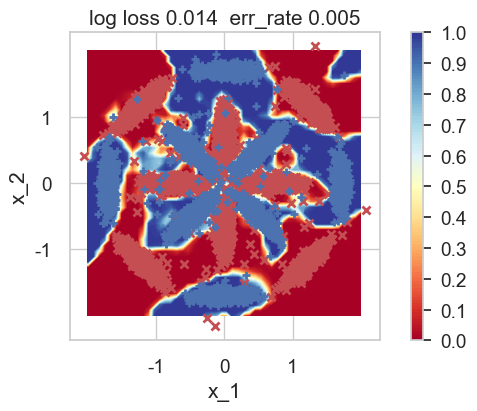

In [27]:
fig, ax_handle = plt.subplots(nrows=1, ncols=1, figsize=(4, 4));
plot_pretty_probabilities_for_clf(mlp, x_tr_N2, y_tr_N, ax=ax_handle, do_show_colorbar=True);
plt.xlabel('x_1'); plt.ylabel('x_2');

## Figure 1 (left): Log loss vs size

TODO if you've filled in the `tr_loss_arr` and `te_loss_arr` correctly so it has shape (S,R) with S sizes and R runs, this code should make a nice plot for you.

Each dot in the plot represents one completed run of the optimizer from a random initialization.


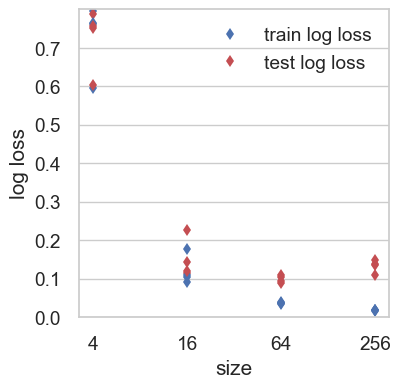

In [28]:
fig, loss_ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), sharex=True, sharey=True)

for run_id in range(n_runs):
    tr_label = 'train log loss' if run_id == 0 else ''
    te_label = 'test log loss' if run_id == 0 else ''
    
    loss_ax.plot(np.log2(size_list), tr_loss_arr[:,run_id], 'bd', label=tr_label)
    loss_ax.plot(np.log2(size_list), te_loss_arr[:,run_id], 'rd', label=te_label)

loss_ax.set_xticks(np.log2(size_list));
loss_ax.set_xticklabels(size_list);
loss_ax.xaxis.grid(False);

loss_ax.set_ylim([0, 0.8]); # Don't touch this please
loss_ax.set_yticks(np.arange(0, 0.8, 0.1));

loss_ax.set_ylabel('log loss');
loss_ax.set_xlabel('size');
loss_ax.legend(loc='upper right');

## Figure 1 (right): Error vs size

TODO if you've filled in the `tr_err_arr` and `te_err_arr` correctly so it has shape (S,R) with S sizes and R runs, this code should make a nice plot for you.


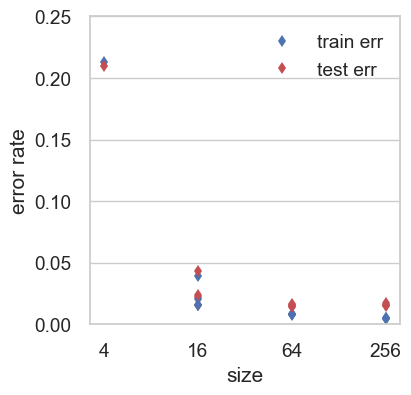

In [29]:
fig, err_ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), sharex=True, sharey=True)

for run_id in range(n_runs):
    tr_label = 'train err' if run_id == 0 else ''
    te_label = 'test err' if run_id == 0 else ''
    
    err_ax.plot(np.log2(size_list), tr_err_arr[:,run_id], 'bd', label=tr_label)
    err_ax.plot(np.log2(size_list), te_err_arr[:,run_id], 'rd', label=te_label)

err_ax.set_xticks(np.log2(size_list));
err_ax.set_xticklabels(size_list);
err_ax.xaxis.grid(False);

err_ax.set_ylim([0, 0.25]); # Don't touch this please

err_ax.set_ylabel('error rate');
err_ax.set_xlabel('size');
err_ax.legend(loc='upper right');